In [1]:
# checkpoints:

# dataclean fonts_df (with or without italic/bold)
# dataclean fonts_df: filter m_labels [recorded]

# dataclean fonts_df: pivot to (146, 26*20*20), embedding input [recorded]

# [notebook]: embedding input to 2D
# must use notebook for manual decisions (or configs) and (manual plotting)
# manual decisions: [decide embedding method (plot), number of k-means (plot)]
# since first plot (with hoverable scatterplot) can only be seperate, 2 notebooks are needed
# manual labelling


# creation & saving of embedding_input to temp (146, 26*20*20) [saved to temp]
# 2D Embedding of embedding_input (146, 2), with color [saved to temp for interactive]
# see # of clusters, [requires interactive notebook] then kmeans
# 
# (optional) EDA with unsupervised: eigen, scatterplot on embedding_input [notebook]
# models

In [2]:
# Data-Clean, then branches as either EDA or Feature Engineering

In [3]:
import os

import pandas as pd
import numpy as np
import tqdm

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np; 

from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import spectral_embedding
from sklearn.manifold import spectral_embedding

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
#np.random.seed(42)

In [5]:
# font: remove fonts that lack alpha_num (for both rounds)
# fontVariant: remove scanned (for both rounds)
# strength: keep only those <= 0.5
# italic: keep only those <= 0.5
# m_label: keep just uppercase (just for clustering)
# orientation: irrelevant, all values = 0
# m_top
# m_left
# originalH
# originalW
# h: irrelevant, all values = 20
# w: irrelevant, all values = 20

In [ ]:
# CONSTANTS
pixel_column_names = []
for i in range(0, 20):
    for j in range(0, 20):
        pixel_column_name = "r{0}c{1}".format(str(i),str(j))
        pixel_column_names.append(pixel_column_name)


#m_labels_all = list(range(33, 221+1)) + [229, 230, 248]

m_labels_num = list(range(49, 58+1))
m_labels_uppercase = list(range(65, 90+1))
m_labels_lowercase = list(range(97, 122+1))

m_labels_alpha = m_labels_uppercase + m_labels_lowercase
m_labels_alpha_num = m_labels_uppercase + m_labels_lowercase + m_labels_num

# CONFIG CONSTANTS

path_folder = "../../data/raw/"
file_name = "fonts.csv"
path_file = os.path.join(path_folder, file_name)

In [4]:
fonts_df = pd.read_csv(path_file)

In [8]:
def get_overlapping_m_labels(sufficient_fonts, fonts_df):
    series = (fonts_df[fonts_df["font"].isin(sufficient_fonts)]
    .drop_duplicates(subset=["font","m_label"])
    )["m_label"].value_counts()
    series_set = set(list(series.index[np.where(series==series.max())[0]]))
    return series_set

In [9]:
def get_sufficient_fonts(fonts_df, m_labels_bare_minimum):
    
    temp_fonts_df = fonts_df

    sufficient_fonts = set(temp_fonts_df["font"])

    #m_labels_bare_minimum = m_labels_alpha_num
    m_labels_set_by_fonts = temp_fonts_df.groupby(["font"])["m_label"].apply(set)
    m_labels_set_adequate_by_fonts = m_labels_set_by_fonts.apply(lambda x: (set(m_labels_bare_minimum)).issubset(x))
    temp_sufficient_fonts = list(
        np.array(m_labels_set_adequate_by_fonts.index)[np.where(m_labels_set_adequate_by_fonts.values)[0]]
    )

    sufficient_fonts &= set(temp_sufficient_fonts)

    orientation_by_fonts = temp_fonts_df.groupby(temp_fonts_df["orientation"]==0.0)["font"].apply(set)
    temp_sufficient_fonts = orientation_by_fonts[True]
    sufficient_fonts &= set(temp_sufficient_fonts)

    scanned_by_fonts = temp_fonts_df.groupby(temp_fonts_df["fontVariant"] != "scanned")["font"].apply(set)
    temp_sufficient_fonts = scanned_by_fonts[True]
    sufficient_fonts &= set(temp_sufficient_fonts)

    return list(sufficient_fonts)

In [10]:
sufficient_fonts = get_sufficient_fonts(fonts_df, m_labels_alpha_num)

# m_labels_overlapping = get_overlapping_m_labels(sufficient_fonts, fonts_df)
# m_labels_overlapping = list(range(33, 221+1)) + [229, 230, 248]

m_labels_selection = m_labels_uppercase

In [14]:
# fixed 
fonts_df = fonts_df[fonts_df["font"].isin(sufficient_fonts)]
fonts_df = fonts_df[~fonts_df["fontVariant"].isin(["scanned"])]

In [ ]:
fonts_df_ = fonts_df.copy()

In [15]:
# variable
fonts_df = fonts_df[fonts_df["m_label"].isin(m_labels_selection)]
fonts_df = fonts_df[fonts_df["strength"]<= 0.5]
fonts_df = fonts_df[fonts_df["italic"]<= 0.5]

In [16]:
# fixed
fonts_df = fonts_df.sort_values(["font","fontVariant","m_label"])
fonts_df = fonts_df.drop_duplicates(subset=["font","m_label","strength","italic"]) 
fonts_df = fonts_df.sort_values(["font","m_label"]) # optional

In [17]:
embedding_input = fonts_df[pixel_column_names].values.reshape(146, 26*20*20)

In [ ]:
# embedding method
embedding_methods = ["pca","spectral_embedding"]
embedding_method = embedding_methods[0]
n_embeddings = 2

# cluster method
cluster_methods = ["k_means", "dbscan"]
cluster_method = cluster_methods[1]
k_means_num_clusters = 4
dbscan_eps = 0.5

In [ ]:
class Temp_Embedding_Cluster_Scatterplot:
    def __init__()

In [1]:
class Temp_Embedding:
    def __init__(self, method, num_embeddings=2):
        self.num_embeddings = num_embeddings
        self.method = method
        if method in ["pca"]:
            self.embedder = PCA(n_components = num_embeddings)
        if method in ["spectral_embedding"]:
            self.embedder = SpectralEmbedding(n_components = num_embeddings, affinity = "nearest_neighbor")
    def fit_transform(self, data):
        embedding = self.embedder.fit_transform(data)
        return embedding
    def __call__(self, data):
        embedding = self.fit_transform(data)
        
        return embedding

In [ ]:
class Temp_Clustering:
    def __init__(self, method):
        self.method
    def __call__(self,)


In [38]:
n_embeddings = 2
np.random.seed(1)
embeddings = SpectralEmbedding(n_embeddings, "nearest_neighbors").fit_transform(embedding_input)
embeddings = SpectralEmbedding(n_embeddings, "nearest_neighbors").fit_transform(embedding_input)

x = embeddings[:,0]
y = embeddings[:,1]
# n = fonts_df["font"].drop_duplicates()

# breakpoint
# either DBSCAN or Kmeans with silhoutte

n_clusters = 4
kmeans = KMeans(n_clusters, random_state=0).fit(embeddings)
groups = kmeans.labels_

c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass affinity=nearest_neighbors as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [24]:
%matplotlib notebook

In [ ]:
class Temp_Embedding_Cluster_Scatterplot:
    def __init__(self, data, embedding):
        self.data = data # the original 146 by 26*400 matrix
        self.embedding = embedding
        arr = [] #np.empty((len(x),20*3,20))
        for i in range(len(x)):
            arr.append(self.[i,0:1200].reshape(20*3, 20))
        self.arr = np.array(arr)
        self.colors = None #list(map(lambda i: (list("rgby"))[i], groups))  

    def hover(self, event):
        # if the mouse is over the scatter points
        if self.line.contains(event)[0]:
            # find out the index within the array from the event
            ind, = self.line.contains(event)[1]["ind"]
            # get the figure size
            w,h = self.fig.get_size_inches()*self.fig.dpi
            ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
            hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
            # if event occurs in the top or right quadrant of the figure,
            # change the annotation box position relative to mouse.
            self.ab.xybox = (self.xybox[0]*ws, self.xybox[1]*hs)
            # make annotation box visible
            self.ab.set_visible(True)
            # place it at the position of the hovered scatter point
            self.ab.xy =(self.x[ind], self.y[ind])
            # set the image corresponding to that point
            self.im.set_data(self.arr[ind,:,:])
        else:
            #if the mouse is not over a scatter point
            self.ab.set_visible(False)
        self.fig.canvas.draw_idle()
    


In [ ]:
arr = [] #np.empty((len(x),20*3,20))
for i in range(len(x)):
    arr.append(self.[i,0:1200].reshape(20*3, 20))
self.arr = np.array(arr)
self.colors = None #list(map(lambda i: (list("rgby"))[i], groups))

# create figure and plot scatter
self.fig = plt.figure(figsize=(8,8))
self.ax = self.fig.add_subplot(111)
self.line, = self.ax.plot(self.x,self.y, alpha=0.2,
                ls="",
                marker="o",
                c="gray"
               )
self.ax.scatter(self.x, self.y, c=self.colors)

# create the annotations box
self.im = OffsetImage(self.arr[0,:,:], zoom=5)
self.xybox=(50., 50.)
self.ab = AnnotationBbox(self.im, (0,0), xybox=self.xybox, xycoords='data',
        boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
self.ax.add_artist(self.ab)
self.ab.set_visible(False)

# add callback for mouse moves
self.fig.canvas.mpl_connect('motion_notify_event', self.hover)           
plt.show()

<IPython.core.display.Javascript object>


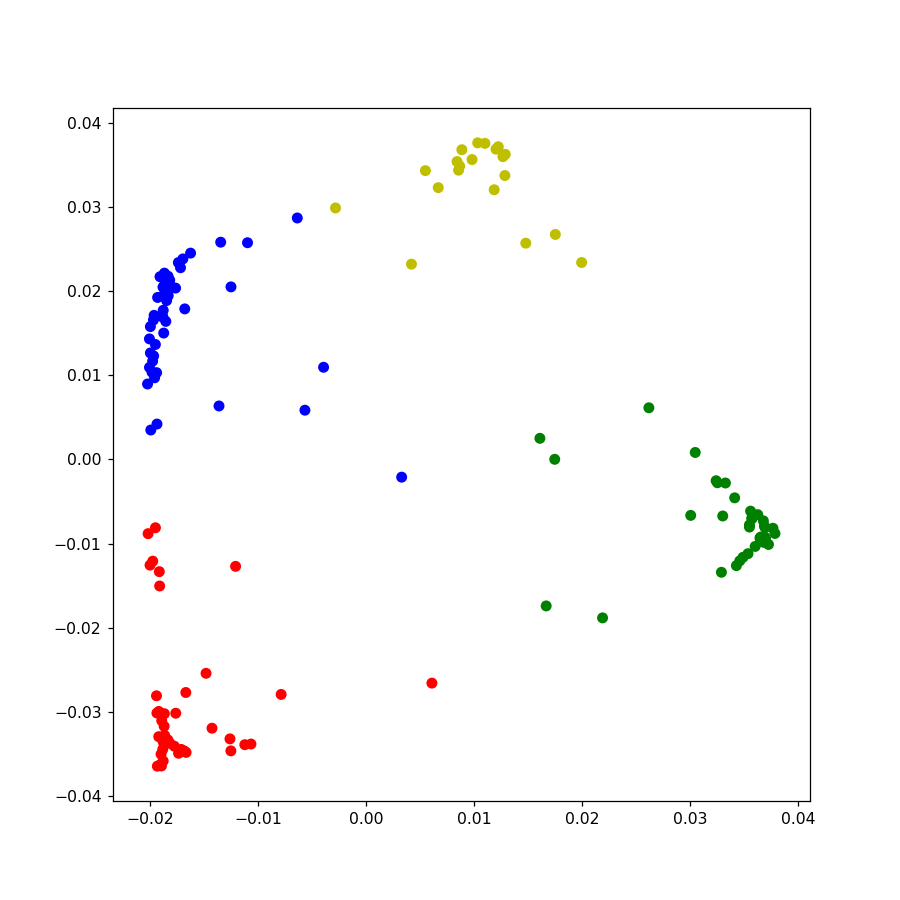

In [52]:
colors = list(map(lambda i: (list("rgby"))[i], groups))
arr = [] #np.empty((len(x),20*3,20))
for i in range(len(x)):
    arr.append(X[i,0:1200].reshape(20*3, 20))
arr = np.array(arr)
# create figure and plot scatter
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
line, = ax.plot(x,y, alpha=0,
                ls="",
                marker="o",
                #c=np.array(colors)
               )
ax.scatter(x,y,c=colors)

# create the annotations box
im = OffsetImage(arr[0,:,:], zoom=5)
xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)

def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        # find out the index within the array from the event
        ind, = line.contains(event)[1]["ind"]
        # get the figure size
        w,h = fig.get_size_inches()*fig.dpi
        ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        # make annotation box visible
        ab.set_visible(True)
        # place it at the position of the hovered scatter point
        ab.xy =(x[ind], y[ind])
        # set the image corresponding to that point
        im.set_data(arr[ind,:,:])
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover)           
plt.show()